# Fully developed baroclinic instability of a 3-layer flow 

In [1]:
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg
from pyqg import diagnostic_tools as tools

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days


## Set up

In [2]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2 
H3 = 1750.       # layer 3 

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.025         # layer 2
U3 = 0.00          # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/200.   # time-step [s]
tmax = 300*Ti      # simulation time [s]

In [3]:
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*10)

2015-11-01 09:24:48,899 - pyqg.model - INFO -  Logger initialized
2015-11-01 09:24:48,976 - pyqg.model - INFO -  Kernel initialized


## Initial condition

In [4]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

## Run the model

In [5]:
m.run()

2015-11-01 09:24:56,724 - pyqg.model - INFO -  Step: 5000, Time: 7.500000e+06, KE: 2.943601e-06, CFL: 0.005405
2015-11-01 09:25:04,047 - pyqg.model - INFO -  Step: 10000, Time: 1.500000e+07, KE: 2.458295e-04, CFL: 0.009907
2015-11-01 09:25:11,367 - pyqg.model - INFO -  Step: 15000, Time: 2.250000e+07, KE: 7.871924e-03, CFL: 0.052224
2015-11-01 09:25:18,647 - pyqg.model - INFO -  Step: 20000, Time: 3.000000e+07, KE: 2.883665e-02, CFL: 0.097805
2015-11-01 09:25:25,984 - pyqg.model - INFO -  Step: 25000, Time: 3.750000e+07, KE: 6.801730e-02, CFL: 0.128954
2015-11-01 09:25:33,610 - pyqg.model - INFO -  Step: 30000, Time: 4.500000e+07, KE: 1.381786e-01, CFL: 0.162363
2015-11-01 09:25:41,222 - pyqg.model - INFO -  Step: 35000, Time: 5.250000e+07, KE: 2.030859e-01, CFL: 0.232705
2015-11-01 09:25:48,808 - pyqg.model - INFO -  Step: 40000, Time: 6.000000e+07, KE: 2.863686e-01, CFL: 0.212858
2015-11-01 09:25:56,022 - pyqg.model - INFO -  Step: 45000, Time: 6.750000e+07, KE: 2.558977e-01, CFL: 0.

## Snapshots

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


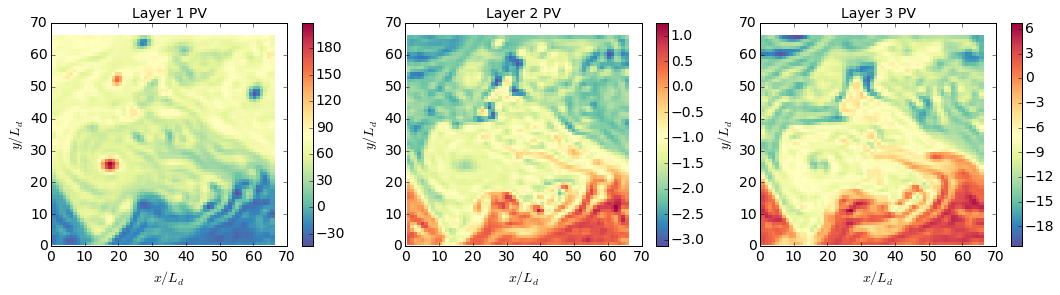

In [6]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

pyqg has a built-in method that computes the vertical modes. 

In [7]:
print "The first baroclinic deformation radius is", m.radii[1]/1.e3, "km"
print "The second baroclinic deformation radius is", m.radii[2]/1.e3, "km"

The first baroclinic deformation radius is 15.375382786 km
The second baroclinic deformation radius is 7.975516272 km


We can project the solution onto the modes

In [8]:
pn = m.modal_projection(m.p)

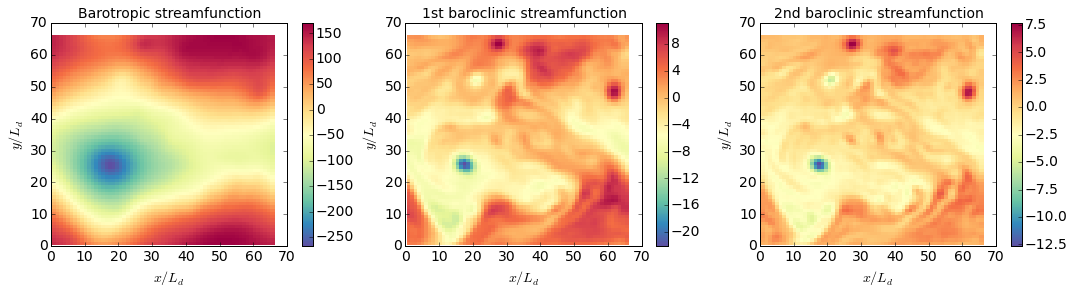

In [9]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,pn[0]/(U1*Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Barotropic streamfunction')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,pn[1]/(U1*Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('1st baroclinic streamfunction')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,pn[2]/(U1*Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('2nd baroclinic streamfunction')

## Diagnostics

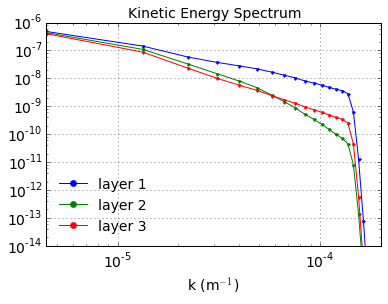

In [14]:
kr, kespec_1 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[0])
_, kespec_2 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[1])
_, kespec_3 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[2])

plt.loglog( kr, kespec_1, '.-' )
plt.loglog( kr, kespec_2, '.-' )
plt.loglog( kr, kespec_3, '.-' )

plt.legend(['layer 1','layer 2', 'layer 3'], loc='lower left')
plt.ylim([1e-14,1e-6]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

By default the modal KE and PE spectra are also calculated

In [15]:
kr, modal_kespec_1 = tools.calc_ispec(m,m.get_diagnostic('KEspec_modal')[0])
_,  modal_kespec_2 = tools.calc_ispec(m,m.get_diagnostic('KEspec_modal')[1])
_,  modal_kespec_3 = tools.calc_ispec(m,m.get_diagnostic('KEspec_modal')[2])

_,  modal_pespec_2 = tools.calc_ispec(m,m.get_diagnostic('PEspec_modal')[0])
_,  modal_pespec_3 = tools.calc_ispec(m,m.get_diagnostic('PEspec_modal')[1])

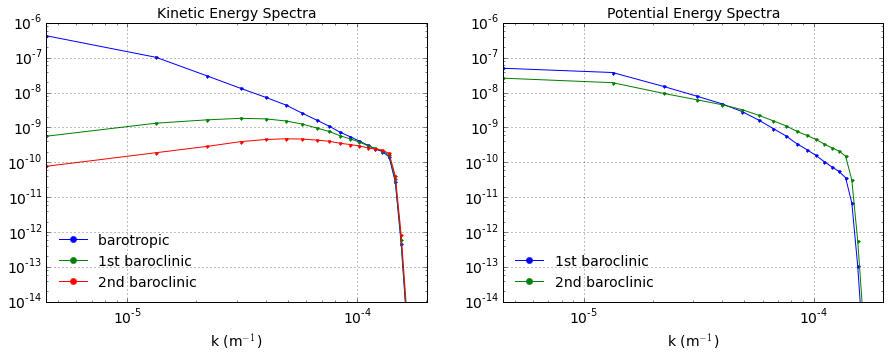

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.loglog( kr, modal_kespec_1, '.-' )
plt.loglog( kr, modal_kespec_2, '.-' )
plt.loglog( kr, modal_kespec_3, '.-' )

plt.legend(['barotropic ','1st baroclinic', '2nd baroclinic'], loc='lower left')
plt.ylim([1e-14,1e-6]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectra');


plt.subplot(122)
plt.loglog( kr, modal_pespec_2, '.-' )
plt.loglog( kr, modal_pespec_3, '.-' )

plt.legend(['1st baroclinic', '2nd baroclinic'], loc='lower left')
plt.ylim([1e-14,1e-6]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Potential Energy Spectra');

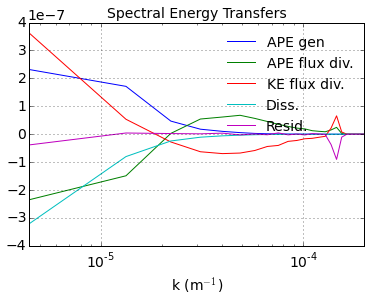

In [13]:
_, APEgenspec =  tools.calc_ispec(m,m.get_diagnostic('APEgenspec'))
_, APEflux =  tools.calc_ispec(m,m.get_diagnostic('APEflux'))
_, KEflux =   tools.calc_ispec(m,m.get_diagnostic('KEflux'))
_, KEspec =   tools.calc_ispec(m,m.get_diagnostic('KEspec')[1]*m.M**2)

ebud = [ APEgenspec,
         APEflux,
         KEflux,
         -m.rek*(m.Hi[-1]/m.H)*KEspec ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux div.','KE flux div.','Diss.','Resid.']
[plt.semilogx(kr, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');


The dynamics here is similar to the reference experiment of [Larichev & Held (1995)](http://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281995%29025%3C2285%3AEAAFIA%3E2.0.CO%3B2). The APE generated through baroclinic instability is fluxed towards deformation length scales, where it is converted into KE. The KE the  experiments and inverse tranfer, cascading up to the scale of the domain. The mechanical bottom drag essentially removes the large scale KE.  